# Modelització

## Aproximacions

En desenvolupar el nostre model ens podem trobar amb expressions complexes que poden resultar en un model massa complex o difícil de calcular.

Quan plantegem el model ens podem trobar que en combinar diferents funcions ens trobem amb un model complex:

\begin{align}
y &= \sqrt{f(x)} e^{f(x)} \\
f(x) &= x^2 + 2x + 1/x \\
y & =  \sqrt{x^2 + 2x + 1/x} e^{x^2 + 2x + 1/x} \\
\end{align}

També ens podem trobar que en construir el model acabem amb equacions diferencials no lineals:

$$P' = a P \sin(\pi/2(1 + P/M))$$

O podem tindre equacions diferencials que hem de resoldre per aproximació numèrica:

$$\frac{\partial a \sqrt{b + x(t)}}{\partial t} = c + d \sqrt{x(t)}$$

En aquestes situacions podem fer aproximacions per
- simplificar el model
- simplificar el càlcul
- fer aproximacions numeèriques

### Factors d'escala i es relatiu dels termes
- Un model amb cert nombre de variables, no tots solen tindre el mateix pes en el resultat final.
- Podem analitzar l'ordre de magnitud relatiu dels diferents termes.
- Si algun terme és poc rellevant, el podem eliminar per simplificar el model.

### Exemple:
- Tenim un model de la forma
$$y = \sqrt{x^2 + 2x + 1/x} \,e^{x^2 + 1/x}$$
- Si la resolució de $x$ és de l'ordre $1\%$

- Si $x \sim O(10)$
    - $x^2 + 2x + 1/x \sim O(10^2 + 10 + 10^{-1})$ i ho podem reduir a $x^2 + 2x$
    
    $$y = \sqrt{x^2 + 2x} \,e^{x^2}$$
    

- Si $x \sim O(10^{-1})$
    - $x^2 + 2x + 1/x \sim O(10^{-2} + 10^{-1} + 10^2)$ i ho podem reduir a $1/x$

$$y = \sqrt{1/x} \,e^{1/x}$$

- Si tenim múltiples variables, hem de fer l'exercici amb cada una d'elles
- A vegades podem fer desenvolupaments en sèries de Taylor per simplificar encara més

### Exemple:
- Tenim un model de la forma
$$z = a + b \sin(\omega x) - a \cos(\omega y)$$
- Si les resolucions de $x$ i $y$ són de l'ordre $1\%$ i tenim valors de $\omega x$ i $\omega y$ al voltant de 0.1

- Per Taylor tenim:
$$z = a + b (\omega x - \frac{1}{6}\omega^3 x^3 + \dots) - a (1 - \frac{1}{2}\omega^2 y^2 + \dots)$$

- i ho podem reduir a:
$$z = a + b \omega x - a (1 - \frac{1}{2}\omega^2 y^2 )$$

$$z = b \omega x + \frac{a}{2}\omega^2 y^2 $$

### Linearització de les equacions diferencials



El nostre model també pot arribar a expressar-se com un sistema d'equacions diferencials no linears que ens pot complicar la resolució.

$$P' = a P \sin(\pi/2(1 + P/M))$$

En aquests casos podem estudiar el rang d'aplicació del nostre model per buscar aproximacions.

Potser ens interessa estudiar les situacions extremes o regions d'estabilitat on $P'$ sigui zero o ens pot interessar un rang molt concret de la nostra variable.

En aquestes situacions podem intentar linealitzar el nostre model mitjançant les sèries de Taylor o expansions binomials.

Si a l'exemple que hem posat suposem que el nostre estudi és per valors petits de $P/M$, podríem aproximar:

\begin{align}
P' &= a P \sin(\pi/2(1 + P/M)) \\
&= a P \cos\left(\frac{\pi P}{2M}\right) \\
&= a P \left(1 - \left(\frac{\pi P}{2M}\right)^2 + O(P^4)\right)\\
\end{align}


El mateix tipus d'aproximacions s'aplica al resoldre numèricament algunes equacions diferencials com veurem a continuació.

En qualsevol cas, haurem d'estimar l'error introduït per l'aproximació numèrica i avaluar fins a quin ordre necessitem fer el càlcul.

Això ho podem fer observant la convergència de resultats de les aproximacions d'ordres superiors.

Exemple:

In [1]:
import numpy as np
import sympy as sp
from sympy.abc import a, b, c, d, t
import matplotlib.pyplot as plt

x = sp.Function('x')(t)

y = a * sp.sqrt(x + b)
yp = sp.diff(y, t)
yp

a*Derivative(x(t), t)/(2*sqrt(b + x(t)))

In [2]:
fx = c + d * sp.sqrt(x)
fx

c + d*sqrt(x(t))

In [3]:
eq = sp.Eq(yp, fx)
eq

Eq(a*Derivative(x(t), t)/(2*sqrt(b + x(t))), c + d*sqrt(x(t)))

In [4]:
sp.classify_ode(eq)

('separable', '1st_power_series', 'lie_group', 'separable_Integral')

In [5]:
xt = sp.dsolve(eq, x)
xt

Eq(-a*Integral(1/(sqrt(_y + b)*(sqrt(_y)*d + c)), (_y, x(t)))/2, C1 - t)

In [6]:
xt2 = sp.dsolve(eq, x, hint='1st_power_series', n=2)
xt2

Eq(x(t), 2*t*sqrt(C1 + b)*(sqrt(C1)*d + c)/a + C1 + O(t**2))

In [7]:
xt3 = sp.dsolve(eq, x, hint='1st_power_series', n=3)
xt3

Eq(x(t), t**2*sqrt(C1 + b)*(sqrt(C1)*d + c)*((sqrt(C1)*d + c)/sqrt(C1 + b) + d*sqrt(C1 + b)/sqrt(C1))/a**2 + 2*t*sqrt(C1 + b)*(sqrt(C1)*d + c)/a + C1 + O(t**3))

In [8]:
xt4 = sp.dsolve(eq, x, hint='1st_power_series', n=4)
xt4

Eq(x(t), t**3*sqrt(C1 + b)*(sqrt(C1)*d + c)*(2*sqrt(C1 + b)*(sqrt(C1)*d + c)*(-(sqrt(C1)*d + c)/(2*(C1 + b)**(3/2)) + d/(sqrt(C1)*sqrt(C1 + b)) - d*sqrt(C1 + b)/(2*C1**(3/2))) + (sqrt(C1)*d + c)*((sqrt(C1)*d + c)/sqrt(C1 + b) + d*sqrt(C1 + b)/sqrt(C1))/sqrt(C1 + b) + d*sqrt(C1 + b)*((sqrt(C1)*d + c)/sqrt(C1 + b) + d*sqrt(C1 + b)/sqrt(C1))/sqrt(C1))/(3*a**3) + t**2*sqrt(C1 + b)*(sqrt(C1)*d + c)*((sqrt(C1)*d + c)/sqrt(C1 + b) + d*sqrt(C1 + b)/sqrt(C1))/a**2 + 2*t*sqrt(C1 + b)*(sqrt(C1)*d + c)/a + C1 + O(t**4))

In [9]:
xt2.rhs.removeO()

C1 + 2*t*sqrt(C1 + b)*(sqrt(C1)*d + c)/a

In [10]:
valors = {'C1':0.1, a:1000, b:2, c:3, d:4}
xt4.rhs.removeO().subs(valors).subs(t, 10).n()

0.235559590946687

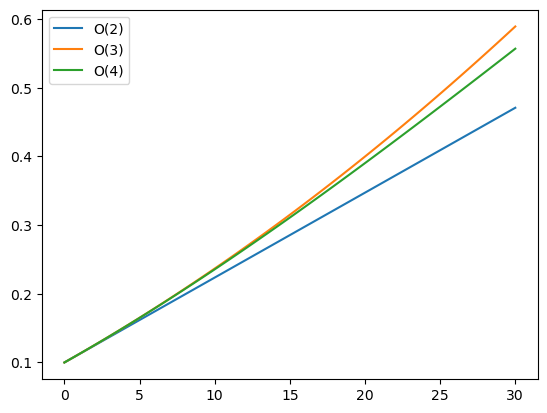

In [11]:
xt2_ = xt2.rhs.removeO().subs(valors).n()
fxt2 = sp.lambdify('t', xt2_)

xt3_ = xt3.rhs.removeO().subs(valors).n()
fxt3 = sp.lambdify('t', xt3_)

xt4_ = xt4.rhs.removeO().subs(valors).n()
fxt4 = sp.lambdify('t', xt4_)


tt = np.linspace(0, 30)
x2 = fxt2(tt)
x3 = fxt3(tt)
x4 = fxt4(tt)

l = plt.plot(tt, x2, tt, x3, tt, x4)
plt.legend(["O(2)", "O(3)", "O(4)"])

Si necessitem valors de $x(t)$ entre 0 i 10, podem estimar l'error observant la convergència de les successives aproximacions.

In [12]:
xt5 = sp.dsolve(eq, x, hint='1st_power_series', n=5)
xt5_ = xt5.rhs.removeO().subs(valors).n()

In [13]:
diff = np.array([xt2_.subs(t, 10) - xt5_.subs(t, 10),
       xt3_.subs(t, 10) - xt5_.subs(t, 10),
       xt4_.subs(t, 10) - xt5_.subs(t, 10),])

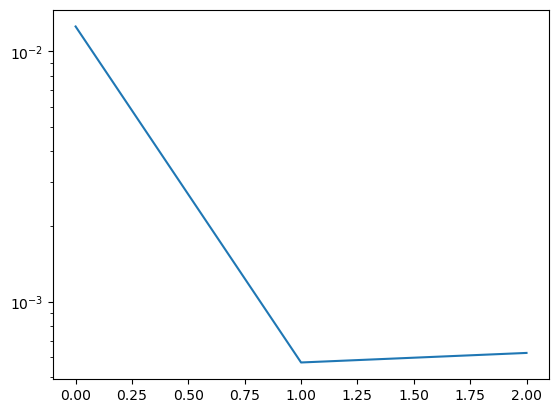

In [14]:
plt.plot(abs(diff))
plt.yscale('log')
plt.show()

# Bibliografia

- <a id='bib_Edwards'></a> Edwards, D., **2001**. *Guide to mathematical modelling*. Palgrave, Basingstoke.
- <a id='bib_Dym'></a> Dym, Clive L., **2004**. *Principles of mathematical modeling*. Elsevier.

Copyright (C) 2022 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: https://www.gnu.org/graphics/gfdl-logo.svg
[GPL3]: https://www.gnu.org/graphics/gplv3-or-later.svg